In [464]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.datasets import cifar10  
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [465]:
import os

count = 0

dataset_path = r'C:\Users\LENOVO\Documents\Semester 5\Pembelajaran mesin dan mendalam\Bagian 6\Tugas6_B_11692\Traindata'

dirs = os.listdir(dataset_path)
for dir in dirs:
    dir_path = os.path.join(dataset_path, dir)
    if os.path.isdir(dir_path):  
        files = os.listdir(dir_path)
        print(f"{dir} Folder has {len(files)} Images")
        count += len(files)

print(f"Total Images in Dataset: {count}")

Biji_strawberry Folder has 100 Images
tumbuhan_dewasa Folder has 102 Images
tunas Folder has 100 Images
Total Images in Dataset: 302


In [466]:
base_dir = r'C:\Users\LENOVO\Documents\Semester 5\Pembelajaran mesin dan mendalam\Bagian 6\Tugas6_B_11692\Traindata'  
img_size = 180 
batch_size = 32  
validation_split = 0.1  

In [467]:
train_datagen = ImageDataGenerator( 
    rescale=1./255, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True, 
    validation_split=0.2 
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),  
    batch_size=batch_size,
    class_mode='categorical',  
    subset='training'  
)


validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),  
    batch_size=batch_size,
    class_mode='categorical', 
    subset='validation' 
)

print(f'Train samples: {train_generator.samples}')
print(f'Validation samples: {validation_generator.samples}')
print(f'Classes: {train_generator.class_indices}')

Found 228 images belonging to 3 classes.


Found 56 images belonging to 3 classes.
Train samples: 228
Validation samples: 56
Classes: {'Biji_strawberry': 0, 'tumbuhan_dewasa': 1, 'tunas': 2}


In [468]:
class_indices = train_generator.class_indices

class_names = list(class_indices.keys())

print("Nama-nama kelas:", class_names)


Nama-nama kelas: ['Biji_strawberry', 'tumbuhan_dewasa', 'tunas']


In [469]:
total_count = len(train_generator.filepaths) 
val_count = int(total_count * validation_split) 
train_count = total_count - val_count 
print("Total Images:", total_count) 
print("Train Images:", train_count) 
print("Validation Images:", val_count)

Total Images: 228
Train Images: 206
Validation Images: 22


In [470]:
num_classes = len(train_generator.class_indices) 
print("Number of classes:", num_classes)

def generator_to_dataset(generator, num_classes): 
    output_signature = ( 
        tf.TensorSpec(shape=(None, img_size, img_size, 3), dtype=tf.float32),                 
        tf.TensorSpec(shape=(None, num_classes), dtype=tf.float32) 
    ) 
    
    return tf.data.Dataset.from_generator( 
        lambda: generator, 
        output_signature=output_signature 
    )

train_ds = generator_to_dataset(train_generator, num_classes) 
val_ds = generator_to_dataset(validation_generator, num_classes)

Number of classes: 3


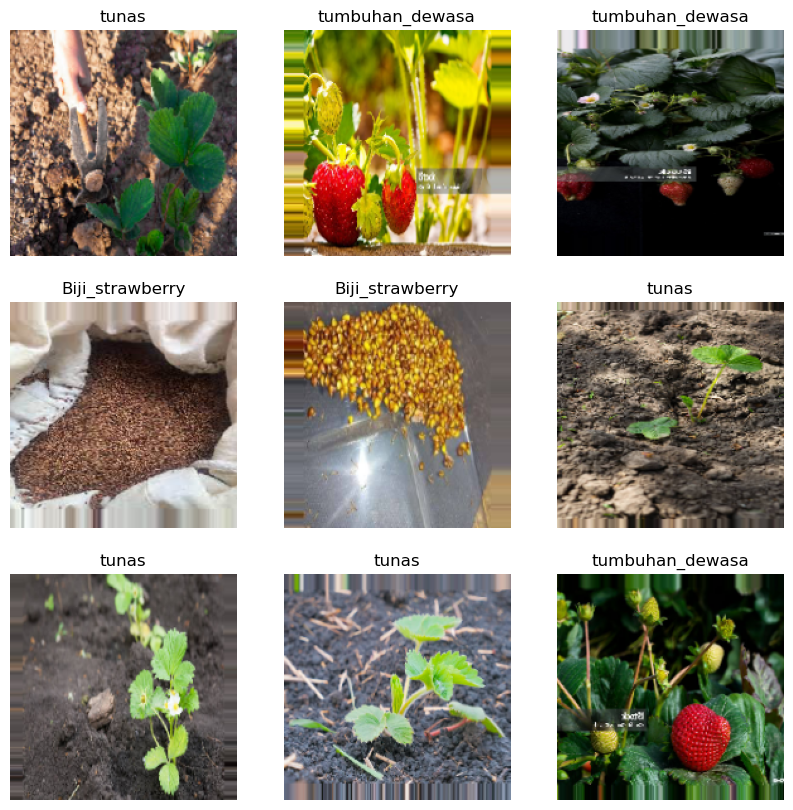

In [471]:
i = 0 
plt.figure(figsize=(10,10)) 

images, labels = next(train_generator)
for i in range(min(batch_size, 9)):  
    plt.subplot(3, 3, i+1) 
    plt.imshow(images[i]) 
    plt.title(class_names[tf.argmax(labels[i])]) 
    plt.axis('off')

plt.show()        

In [472]:
import numpy as np

# Tampilkan gambar dengan shape (32, 180, 180, 3)
for images, labels in train_ds.take(1):
    images_array = np.array(images)
    print(images_array.shape) 

(32, 180, 180, 3)


In [473]:
AUTOTUNE = tf.data.AUTOTUNE

In [474]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [475]:
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [476]:
data_augmentation = Sequential([ 
    layers.RandomFlip("horizontal", input_shape=(img_size, img_size, 3)),                              
    layers.RandomRotation(0.1), 
    layers.RandomZoom(0.1) 
])

c:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Found 284 files belonging to 3 classes.
Using 228 files for training.


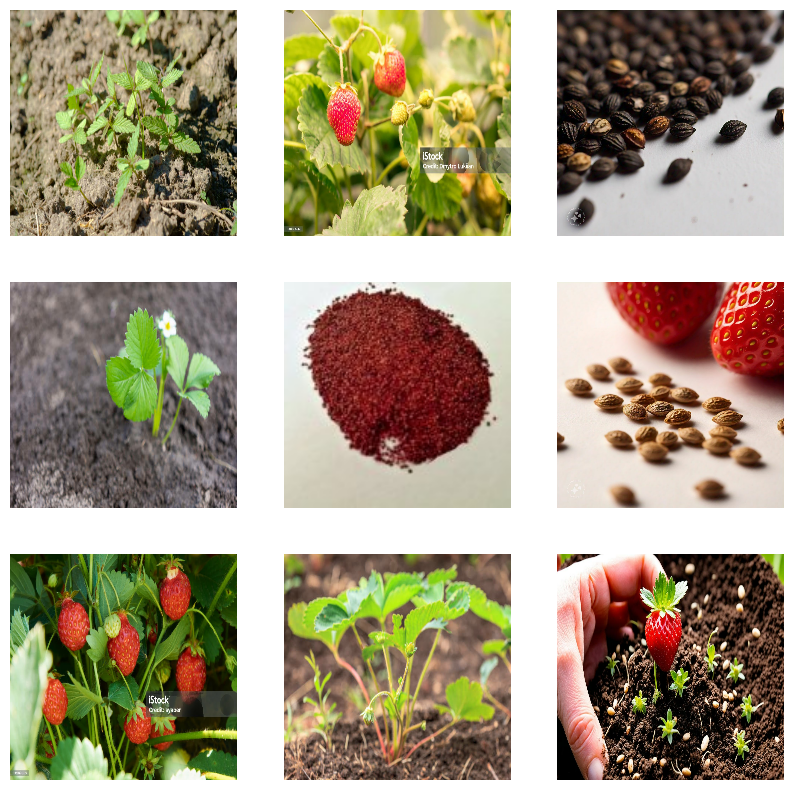

In [477]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_data_dir = r'C:\Users\LENOVO\Documents\Semester 5\Pembelajaran mesin dan mendalam\Bagian 6\Tugas6_B_11692\Traindata'

train_ds = image_dataset_from_directory(
    train_data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(227, 227),
    batch_size=32
)

for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
    plt.show()

In [478]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import Sequential

# Bangun AlexNet
def build_alexnet(input_shape, num_classes):
    model = Sequential([
        # Input layer
        layers.InputLayer(input_shape=input_shape),

        # Convolutional layers
        layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', padding='valid'),
        layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'),
        
        layers.Conv2D(256, (5, 5), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'),
        
        layers.Conv2D(384, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(384, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        
        # Pooling layer
        layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'),
        
        # Flatten and Dense layers
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Misalnya, ukuran gambar input (224x224x3) dan jumlah kelas yang diinginkan
img_size = 224
num_classes = len(class_names)  # Sesuaikan dengan jumlah kelas yang ada

model = build_alexnet(input_shape=(img_size, img_size, 3), num_classes=num_classes)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


c:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [479]:
# Menampilkan struktur model
model.summary()

Model: "sequential_71"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_100 (Conv2D)             │ (None, 54, 54, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_60 (MaxPooling2D) │ (None, 26, 26, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_101 (Conv2D)             │ (None, 26, 26, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_61 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_102 (Conv2D)             │ (None, 12, 12, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_103 (Conv2D)             │ (None, 12, 12, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_104 (Conv2D)             │ (None, 12, 12, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_62 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_20 (Flatten)            │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 4096)           │    26,218,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_58 (Dropout)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_59 (Dropout)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 3)              │        12,291 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,759,299 (178.37 MB)

 Trainable params: 46,759,299 (178.37 MB)

 Non-trainable params: 0 (0.00 B)

In [480]:
model.save('alexnet_model.h5')

In [500]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from PIL import Image

# Memuat model AlexNet yang sudah dilatih
model = load_model(r'C:\Users\LENOVO\Documents\Semester 5\Pembelajaran mesin dan mendalam\Bagian 6\Tugas6_B_11692\alexnet_model.h5')  # Ganti dengan path model Anda
class_names = ['biji', 'tunas', 'tumbuhan_dewasa'] # kelas yang ada pada model

# Fungsi untuk mengklasifikasikan gambar dan menyimpan gambar asli
def classify_images(image_path, save_path='predicted_image.jpg'):
    try:
        # Memuat dan mempersiapkan gambar untuk prediksi
        input_image = tf.keras.utils.load_img(image_path, target_size=(224, 224)) # Mengubah ukuran gambar menjadi 224x224 pixel
        input_image_array = tf.keras.utils.img_to_array(input_image) # Mengubah gambar jadi array numpy agar bisa di proses model
        input_image_exp_dim = tf.expand_dims(input_image_array, 0)  # Menambahkan dimensi batch agar sesuai dengan input model
                                                                    # Dimensi menjadi (1, 224, 224, 3)

        # Melakukan prediksi
        predictions = model.predict(input_image_exp_dim) # Melakukan prediksi pada gambar yang telah diproses
        result = tf.nn.softmax(predictions[0]) # Menghitung hasil prediksi menggunakan softmax untuk mendapatkan probabilitas tiap kelas
        class_idx = np.argmax(result) # Menemukan indeks kelas dengan probabilitas tertinggi
        confidence = np.max(result) * 100 # Menghitung confidence dalam persentase

        # Menampilkan hasil prediksi dan confidence
        print(f"Prediksi: {class_names[class_idx]}") # Menampilkan nama kelas yang diprediksi 
        print(f"Confidence: {confidence:.2f}%") # Menampilkan nilai confidence

        # Menyimpan gambar asli tanpa teks
        input_image = Image.open(image_path) # Membuka gambar yang ada di path
        input_image.save(save_path) # Menyimpan gambar asli ke dalam path yang telah ditentukan

        return f"Prediksi: {class_names[class_idx]} dengan confidence {confidence:.2f}%. Gambar asli disimpan di {save_path}."
    except Exception as e:
        return f"Terjadi kesalahan: {e}"
    
result = classify_images(r'C:\Users\LENOVO\Documents\Semester 5\Pembelajaran mesin dan mendalam\Bagian 6\Tugas6_B_11692\test_data\tumbuhan_dewasa\istockphoto-1322623724-1024x1024.jpg', save_path='matang.jpg')
print(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Prediksi: tumbuhan_dewasa
Confidence: 57.57%
Prediksi: tumbuhan_dewasa dengan confidence 57.57%. Gambar asli disimpan di matang.jpg.


Found 10 files belonging to 1 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Precision: [0. 0. 0.]
Recall: [0. 0. 0.]


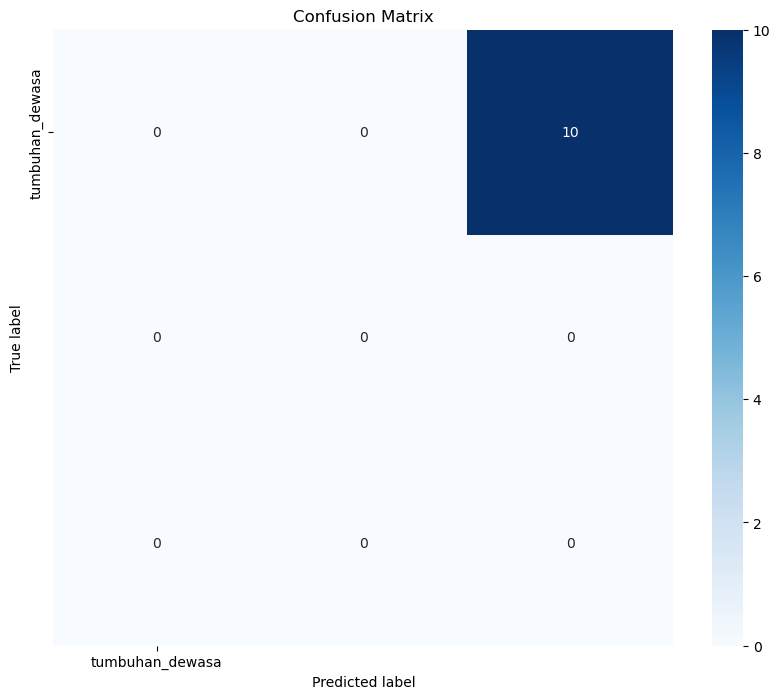

Confusion Matrix:
 [[ 0.  0. 10.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
Akurasi: 0.0
Presisi: [0. 0. 0.]
Recall: [0. 0. 0.]
F1 Score: [0. 0. 0.]


In [501]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import seaborn as sns
import matplotlib.pyplot as plt

# Memuat model AlexNet yang telah dilatih sebelumnya
alexNet_model = load_model(r'C:\Users\LENOVO\Documents\Semester 5\Pembelajaran mesin dan mendalam\Bagian 6\Tugas6_B_11692\alexnet_model.h5')

# Memuat data uji yang sebenarnya
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    r'test_data',  # Direktori data uji
    labels='inferred',  # Label otomatis dari subfolder yang ada
    label_mode='categorical',  # Menghasilkan label dalam bentuk one-hot encoding
    batch_size=32,  # Ukuran batch untuk pemrosesan
    image_size=(224, 224)  # Ukuran gambar yang akan diproses sesuai dengan input AlexNet
)

# Definisikan class_names untuk confusion matrix
class_names = test_data.class_names

# Prediksi model
y_pred = alexNet_model.predict(test_data)
y_pred_class = tf.argmax(y_pred, axis=1, output_type=tf.int32)  # Konversi ke kelas prediksi dengan tipe data int32

# Ekstrak label sebenarnya dari test_data dan konversi ke bentuk indeks kelas
true_labels = []  # Menyimpan label asli dalam bentuk indeks
for images, labels in test_data:
    true_labels.extend(tf.argmax(labels, axis=1).numpy())  # Konversi one-hot ke indeks kelas
true_labels = tf.convert_to_tensor(true_labels, dtype=tf.int32)  # Mengkonversi list ke tensor untuk perhitungan dengan tipe data int32

# Membuat confusion matrix untuk evaluasi
conf_mat = tf.math.confusion_matrix(true_labels, y_pred_class)
conf_mat = tf.cast(conf_mat, tf.float32)  # Ubah tipe data confusion matrix menjadi float32

# Menghitung akurasi berdasarkan confusion matrix
accuracy = tf.reduce_sum(tf.linalg.diag_part(conf_mat)) / tf.reduce_sum(conf_mat)

# Menghitung presisi dan recall dari confusion matrix dengan pengecekan untuk menghindari pembagian dengan nol
precision = tf.linalg.diag_part(conf_mat) / (tf.reduce_sum(conf_mat, axis=0) + tf.keras.backend.epsilon())
recall = tf.linalg.diag_part(conf_mat) / (tf.reduce_sum(conf_mat, axis=1) + tf.keras.backend.epsilon())

# Menambahkan debug untuk melihat nilai precision dan recall
print("Precision:", precision.numpy())
print("Recall:", recall.numpy())

# Menghitung F1 Score
f1_score = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())

# Pastikan F1 score tidak mengandung nilai NaN atau inf (bisa terjadi jika precision dan recall sangat kecil atau 0)
f1_score = tf.where(tf.math.is_nan(f1_score), tf.zeros_like(f1_score), f1_score)

# Visualisasi Confusion Matrix
plt.figure(figsize=(10, 8))  # Mengatur ukuran gambar
sns.heatmap(conf_mat.numpy().astype(int), annot=True, fmt='d', cmap='Blues',  # Annot=True untuk menampilkan angka di dalam setiap sel matriks
                                                                    # Fmt='d' untuk menampilkan bilangan bulat tanpa desimal
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Menampilkan hasil
print("Confusion Matrix:\n", conf_mat.numpy())
print("Akurasi:", accuracy.numpy())
print("Presisi:", precision.numpy())
print("Recall:", recall.numpy())
print("F1 Score:", f1_score.numpy())
